In [ ]:
# smtplib 用于邮件的发信动作
import smtplib
# email 用于构建邮件内容
from email.mime.text import MIMEText
# 构建邮件头
from email.header import Header
import datetime

In [ ]:
# 发信方的信息：发信邮箱，QQ 邮箱授权码
from_addr = '1580524241@qq.com'
password = 'xoyiazfnbpwjigbh'
# 收信方邮箱
to_addr = '389002792@qq.com'
# 发信服务器
smtp_server = 'smtp.qq.com'

In [ ]:
# 邮箱正文内容，第一个参数为内容，第二个参数为格式(plain 为纯文本)，第三个参数为编码
strTime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
epoch = 1
email11 = '实验在第 ' + str(epoch) + 'epoch 结束\n' + '结束时间为：' + strTime
msg = MIMEText(email11, 'plain', 'utf-8')
# 邮件头信息
msg['From'] = Header('张三')  # 发送者
msg['To'] = Header('李四')  # 接收者
subject = 'Python SMTP 邮件测试'
msg['Subject'] = Header(subject, 'utf-8')  # 邮件主题

In [ ]:
try:
    smtpobj = smtplib.SMTP_SSL(smtp_server)
    # 建立连接--qq邮箱服务和端口号（可百度查询）
    smtpobj.connect(smtp_server, 465)    
    # 登录--发送者账号和口令
    smtpobj.login(from_addr, password)   
    # 发送邮件
    smtpobj.sendmail(from_addr, to_addr, msg.as_string()) 
    print("邮件发送成功")
except smtplib.SMTPException:
    print("无法发送邮件")
finally:
    # 关闭服务器
    smtpobj.quit()

In [ ]:
import os
import numpy as np
import pickle
# import imageio
import cv2 as cv 
import matplotlib.pyplot as plt
import encode_imagecopy as ecode
from PIL import Image as img
import argparse

# file = 'X:\Directory\code\Durable-Federated-Learning-Backdoor\FL_Backdoor_CV\data\cifar-10-batches-py\data_batch_1'
# 解压缩，返回解压后的字典
def main():
    file = 'D:\code\code_xwd\Durable-Federated-Learning-Backdoor\FL_Backdoor_CV\data\cifar-10-batches-py\data_batch_01'

    write_into_cifar10_poisondata(file)

def write_into_cifar10_poisondata(file):
    dict = poison_cifar10(file)
    fo = open(file, 'wb+')
    fo = fo.write(dict)
    fo.close()

def unpickle(file):
    fo = open(file, 'rb')
    dict = pickle.load(fo, encoding='latin1')
    fo.close()
    return dict

def poison_cifar10(file):
    label_dict = {
        0:'plane',
        1:'car',
        2:'bird',
        3:'cat',
        4:'deer',
        5:'dog',
        6:'frog',
        7:'horse',
        8:'ship',
        9:'truck'
    }
    
    # 第几张图片
    line_number = 0
    # 要poi几张
    pic_number = 1
    # 显示测试集图片
    dict = unpickle(file)
    data = dict.get("data")
    label = dict.get("labels")
    for line_number in range(pic_number):
        image_m = np.reshape(data[line_number], (3, 32, 32))
        image_label = label[line_number]
        r = image_m[0, :, :]
        g = image_m[1, :, :]
        b = image_m[2, :, :]
        img32 = np.array(cv.merge([r, g, b]))

        print(data.shape)

        # 扩充
        img224 = cv.resize(img32, (224, 224), 1)

        encode_start = 1

        if encode_start == 1:
            im_hidden, im_residual = ecode.encode(img224, line_number)
            
        img32_compress = cv.resize(im_hidden, (32, 32), 1)

        # python的数列范围是不取最后一个的
        print(img32_compress.shape)

        temp_r = np.reshape(img32_compress[:, :, 0], (1024, ))
        temp_g = np.reshape(img32_compress[:, :, 1], (1024, ))
        temp_b = np.reshape(img32_compress[:, :, 2], (1024, ))

        dict.get("data")[line_number,0:1024] = temp_r 
        dict.get("data")[line_number,1024:2048] = temp_g
        dict.get("data")[line_number,2048:3072] = temp_b

        backout_r = dict.get("data")[line_number,0:1024].reshape(32, 32)
        backout_g = dict.get("data")[line_number,1024:2048].reshape(32, 32)
        backout_b = dict.get("data")[line_number,2048:3072].reshape(32, 32)
        img32_backout = np.array(cv.merge([backout_r, backout_g, backout_b]))
        
        # plt.ion()
        plt.figure()
        plt.subplot(1, 3, 1)
        plt.imshow(img32)   # cifar10 原图
        plt.subplot(1, 3, 2)
        plt.imshow(img32_backout)   # cifar10 回传后提出来看有没有进去
        plt.title(label_dict[label[line_number]])
        plt.subplot(1, 3, 3)
        plt.imshow(img224)  # cifar10 扩充224图
    plt.show()
    return dict

if __name__ == "__main__":
    main()

In [ ]:
# plt.ion()
plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(img32)   # cifar10 原图
plt.subplot(2, 2, 2)
plt.imshow(img224)  # cifar10 扩充224图
plt.subplot(2, 2, 3)
plt.imshow(img32_compress)  # cifar10 压缩至32后的图
plt.title(label_dict[label[line_number]])
plt.subplot(2, 2, 4)
plt.imshow(img32_backout)   # cifar10 回传后提出来看有没有进去
plt.show()

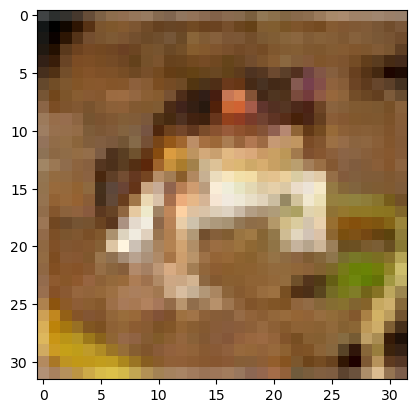

In [1]:
import os
import numpy as np
import pickle
# import imageio
import cv2 as cv 
import matplotlib.pyplot as plt
import encode_imagecopy as ecode
from PIL import Image as img
import argparse

# file = 'D:\code\code_xwd\Durable-Federated-Learning-Backdoor\FL_Backdoor_CV\data\cifar-10-batches-py\data_batch_01'
file = 'X:\Directory\code\Durable-Federated-Learning-Backdoor\FL_Backdoor_CV\data\cifar-10-batches-py\data_batch_1 copy'
def unpickle(file):
    fo = open(file, 'rb')
    dict = pickle.load(fo, encoding='latin1')
    fo.close()
    return dict

# 第几张图片
line_number = 0
# 显示测试集图片
dict = unpickle(file)
data = dict.get("data")
label = dict.get("labels")
image_m = np.reshape(data[line_number], (3, 32, 32))
image_label = label[line_number]
r = image_m[0, :, :]
g = image_m[1, :, :]
b = image_m[2, :, :]
img32 = np.array(cv.merge([r, g, b]))

plt.figure()
plt.imshow(img32)
plt.show()